# EDA and Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/cleaned_data.csv')

In [3]:
df.head()

,HRHHID,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
0,581125017600866,14,4,37,-1,60,2,1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
1,581125017600866,14,4,35,-1,-1,2,1,-1,-1,...,Unknown,Yes,NaN,No,No,NaN,NaN,NaN,No,NaN
2,581125017600866,14,4,16,-1,-1,0,1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,HS
3,581125017600866,14,4,13,-1,-1,0,1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,NaN
4,809001585510960,13,3,28,-1,40,1,2,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,bi-week,No,College


In [4]:
df.drop('HRHHID', axis=1, inplace=True)

- Dropping anyone under the age of 16 because out of the 23, only one had a job and since we still have the household info, we already know if the household is food insecure or not. The 'QSTNUM' column is household indicater so duplicates will be dropped, keeping the main/first person questioned in the survey.

In [5]:
df.drop(df[df['PRTAGE'] < 16].index, inplace = True)

In [6]:
df.drop_duplicates(subset='QSTNUM', inplace=True)

In [7]:
print(f"The youngest person in this data set is {df['PRTAGE'].min()}")
print(f"The oldest person in this data set is {df['PRTAGE'].max()}")

The youngest person in this data set is 16
The oldest person in this data set is 85


## Hours Worked and Jobs

- The null values in job loss will be filled with 'No' to indicate that the individual did not lose their job.

- In the hours worked per week, -4 meant hours varied so I imputed with the mode here by first replacing -4 with NaN to turn null then fillna with 40 hours. When using fillna for this one it didn't actually change it so I just did the replace method again after finding that 40 was the most occring hours worked apart from -1 but that will be addressed later.

In [8]:
df['job_loss'] = df['job_loss'].fillna('No')

In [9]:
df['PEHRUSLT'].replace([-4], ['NaN'], inplace=True)

In [10]:
df['PEHRUSLT'].replace(['NaN'], [40], inplace=True)

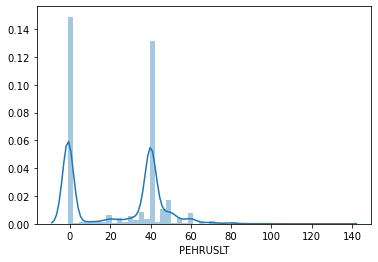

In [11]:
sns.distplot(df['PEHRUSLT']);

- This plot is just showing the distribution of the hours worked each week. As expected, the average (disregarding the -1 value which will be addressed below) sits around 40 hours a week.
- I have decided to drop pay period, change -1 in hours worked to 0, and fill the null values in the in school column with 'no'.
- The rest of the -1 values in the data set will be changed to 0's that way I am not working with any negative values 

In [12]:
df.loc[(df['PEHRUSLT'] == -1)]

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
9,7,3,22,-1,-1,1,5,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN
22,6,2,72,2,-1,0,10,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,NaN
24,9,3,55,2,-1,0,11,-1,-1,-1,...,Unknown,No,NaN,No,No,No,NaN,NaN,No,NaN
29,1,2,36,-1,-1,1,13,360,2,-1,...,No,No,NaN,No,No,No,NaN,NaN,No,College
32,4,1,61,-1,-1,0,15,-1,-1,-1,...,Unknown,Yes,NaN,No,No,No,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138584,6,1,69,-1,-1,0,69946,110,-1,-1,...,Yes,Yes,NaN,No,No,No,NaN,NaN,No,NaN
138690,11,2,49,-1,-1,0,70041,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,NaN
138692,15,1,79,2,-1,0,70042,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN
138704,9,2,78,2,-1,0,70054,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN


In [13]:
df['PEHRUSLT'].replace([-1], [0], inplace=True)

In [14]:
df.drop('pay_period', axis=1, inplace=True)

In [15]:
df['in_school'] = df['in_school'].fillna('No') 

In [16]:
df['type_job'] = df['type_job'].fillna(0)

In [17]:
df['HETSP3O'].replace([-1], [0], inplace=True)

In [18]:
df.replace([-1], [0], inplace=True)

## Location Based Analysis

In [19]:
df['region'].value_counts(normalize=True).mul(100).round(2)

South    37.60
West     26.44
MidW     19.79
North    16.18
Name: region, dtype: float64

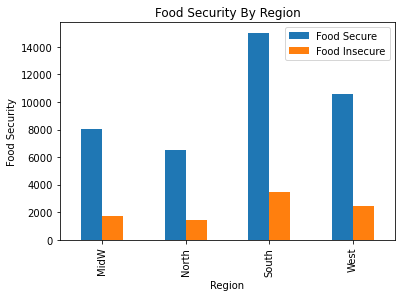

In [20]:
pd.crosstab(df.region,df.food_secure).plot(kind='bar')

plt.xlabel('Region')
plt.ylabel('Food Security')
plt.title('Food Security By Region')
plt.legend(('Food Secure', 'Food Insecure'));

- More people in this data set were interviewed from the South and therefor had a higher percentage of both food secure and insecure.

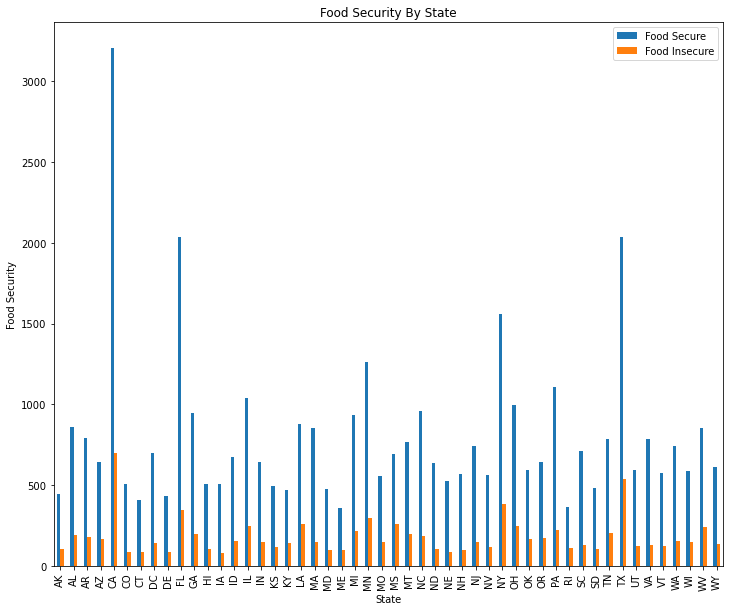

In [21]:
pd.crosstab(df.state,df.food_secure).plot(kind='bar', figsize=(12,10))

plt.xlabel('State')
plt.ylabel('Food Security')
plt.title('Food Security By State')
plt.legend(('Food Secure', 'Food Insecure'));

- For the most part, there was about an even amount of households interviewed from each state with the exception being California and Texas. These two states are relatively large and have huge populations so it would make since to try and interview a bit more people to get a better understanding how food security. This graph shows food security based on statesand shows that food insecurity fluctuates from state to state.

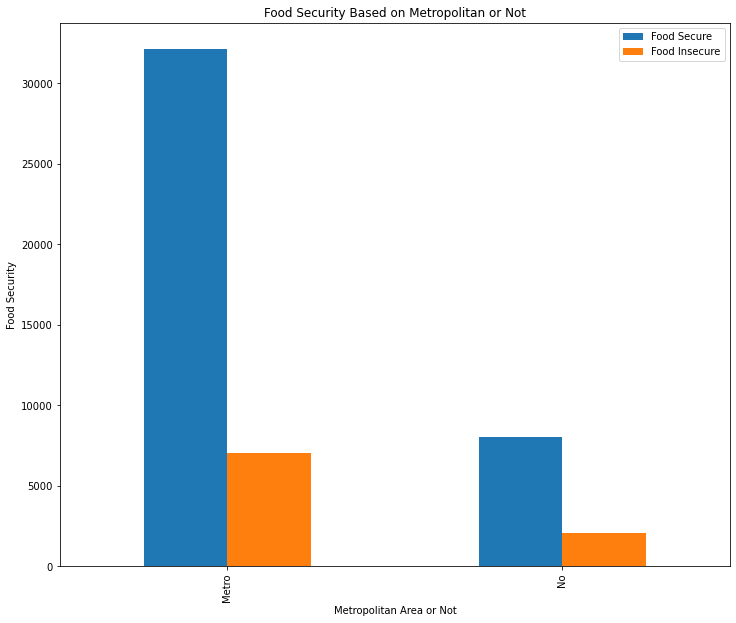

In [22]:
pd.crosstab(df.is_metro,df.food_secure).plot(kind='bar', figsize=(12,10))

plt.xlabel('Metropolitan Area or Not')
plt.ylabel('Food Security')
plt.title('Food Security Based on Metropolitan or Not')
plt.legend(('Food Secure', 'Food Insecure'));

In [23]:
df['is_metro'].value_counts(normalize=True).mul(100).round(2)

Metro    79.51
No       20.49
Name: is_metro, dtype: float64

- 80% of individuals interviewed lived in a metropolitan area which explains the higher percentage of food insecurity occuring in metropolitan areas vs non-metro areas.

## Age Analysis

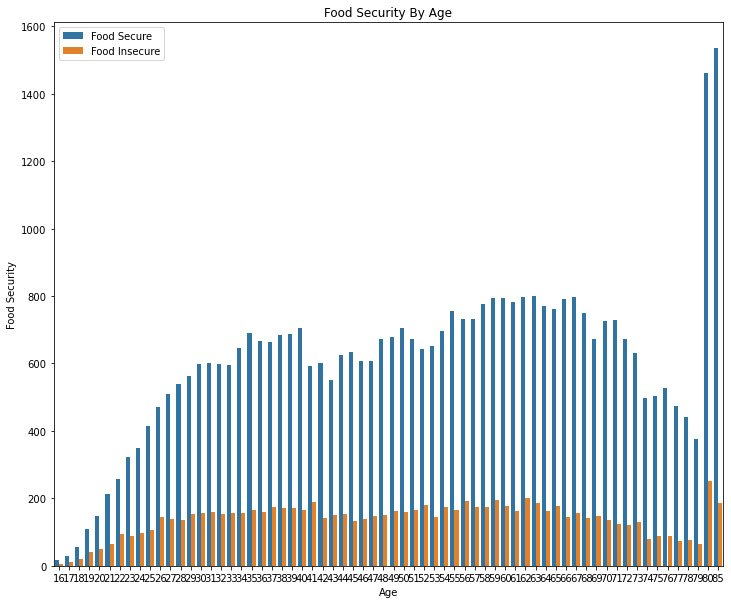

In [24]:
plt.figure(figsize=(12,10))

sns.countplot(x=df['PRTAGE'], hue=df['food_secure']);


plt.xlabel('Age')
plt.ylabel('Food Security')
plt.title('Food Security By Age')
plt.legend(('Food Secure', 'Food Insecure'));

- Next I looked at the distribution of food security/insecurity based on age. For the most part, there was roughly an even amount of people questioned from each age group and I have dropped anyone under 16 who didn't have a job. To make the graph and data a little more readible I will be creating age groups.

In [25]:
df['PRTAGE'].replace([16, 17, 18, 19], [19, 19, 19, 19], inplace=True)

df['PRTAGE'].replace([20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                     [20, 20, 20, 20, 20, 20, 20, 20, 20,20], inplace=True)

df['PRTAGE'].replace([30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 
                     [30, 30, 30, 30, 30, 30, 30, 30, 30,30], inplace=True)

df['PRTAGE'].replace([40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 
                     [40, 40, 40, 40, 40, 40, 40, 40, 40,40], inplace=True)

df['PRTAGE'].replace([50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 
                     [50, 50, 50, 50, 50, 50, 50, 50, 50,50], inplace=True)

df['PRTAGE'].replace([60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 
                     [60, 60, 60, 60, 60, 60, 60, 60, 60,60], inplace=True)

df['PRTAGE'].replace([70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 
                     [70, 70, 70, 70, 70, 70, 70, 70, 70,70], inplace=True)

df['PRTAGE'].replace([80, 85], [80, 85], inplace=True)

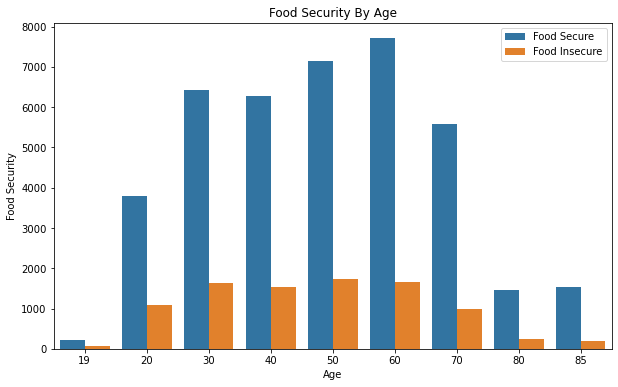

In [26]:
plt.figure(figsize=(10,6))

sns.countplot(x=df['PRTAGE'], hue=df['food_secure']);


plt.xlabel('Age')
plt.ylabel('Food Security')
plt.title('Food Security By Age')
plt.legend(('Food Secure', 'Food Insecure'));

- Now that everyone is separated into age groups, we can see that most people who are food insecure are in the age ranges of 20-70.

## Household Analysis

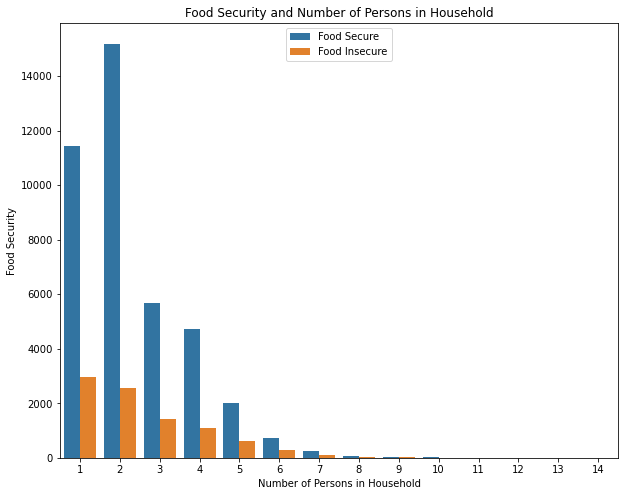

In [27]:
plt.figure(figsize=(10,8))

sns.countplot(x=df['HRNUMHOU'], hue=df['food_secure']);


plt.xlabel('Number of Persons in Household')
plt.ylabel('Food Security')
plt.title('Food Security and Number of Persons in Household')
plt.legend(('Food Secure', 'Food Insecure'));

- This graph is showing the distribution of food security/insecurity based on the number of people in a household. Overall, it seems to be evenly distributed with the exception ebing 1 person household and 5+ person household. Since there is one household that has 10+, to get rid of outliers in this section I will convert all households with 6+ members to the value of 6 since 6 is where it really starts to trail off.

In [28]:
df['HRNUMHOU'].replace([7, 8, 9, 10, 11, 12, 13, 14], [6,6,6,6,6,6,6,6], inplace=True)

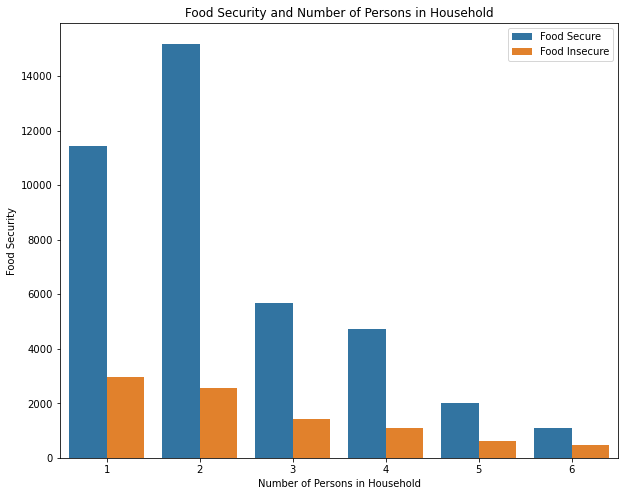

In [29]:
plt.figure(figsize=(10,8))

sns.countplot(x=df['HRNUMHOU'], hue=df['food_secure']);

plt.xlabel('Number of Persons in Household')
plt.ylabel('Food Security')
plt.title('Food Security and Number of Persons in Household')
plt.legend(('Food Secure', 'Food Insecure'));

In [30]:
df['HRNUMHOU'].value_counts(normalize=True).mul(100).round(2)

2    36.02
1    29.21
3    14.42
4    11.83
5     5.39
6     3.13
Name: HRNUMHOU, dtype: float64

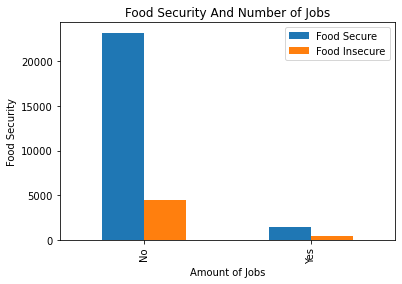

In [31]:
pd.crosstab(df.mul_jobs,df.food_secure).plot(kind='bar')

plt.xlabel('Amount of Jobs')
plt.ylabel('Food Security')
plt.title('Food Security And Number of Jobs')
plt.legend(('Food Secure', 'Food Insecure'));

- Individuals who had 1 or no jobs had a higher chance of experiencing food insecurity than those who had multiple jobs.

## Race/Ethnicity Analysis

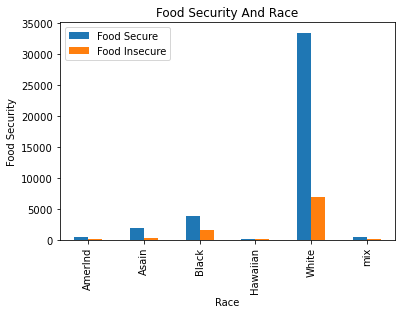

In [32]:
pd.crosstab(df.race,df.food_secure).plot(kind='bar')

plt.xlabel('Race')
plt.ylabel('Food Security')
plt.title('Food Security And Race')
plt.legend(('Food Secure', 'Food Insecure'));

In [33]:
df['race'].value_counts(normalize=True).mul(100).round(2)

White       81.78
Black       10.86
Asain        4.49
mix          1.36
AmerInd      1.16
Hawaiian     0.35
Name: race, dtype: float64

In [34]:
df.drop(['is_hispanic'], axis=1, inplace=True)

- I was going to see if there was a racial component to those who experienced food insecurity based on my knowledge of food insecure areas in Louisville, but this data set is approximately 82% white.

## Gender and Income Analysis

In [35]:
df['HEFAMINC'].value_counts()

15    6430
16    6134
14    6033
13    4887
12    4005
11    3974
9     2885
10    2658
7     2549
8     2402
6     1921
4     1374
5     1258
1     1194
3      979
2      576
Name: HEFAMINC, dtype: int64

- The data dictionary shows that the values from 1 to 16 represent different income levels so for better interpertabilty I will convert these back to their range values to get a better sense of each household's income level.

In [36]:
df['HEFAMINC'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
                       [5000,7500,10000,12500,15000,20000,25000,30000,35000,40000,
                        50000,60000,75000,100000,150000,150000], inplace=True)

In [37]:
df['HEFAMINC'].value_counts(normalize=True).mul(100).round(2)

150000    25.51
100000    12.25
75000      9.92
60000      8.13
50000      8.07
35000      5.86
40000      5.40
25000      5.17
30000      4.88
20000      3.90
12500      2.79
15000      2.55
5000       2.42
10000      1.99
7500       1.17
Name: HEFAMINC, dtype: float64

In [38]:
df['HRNUMHOU'].value_counts(normalize=True).mul(100).round(2)

2    36.02
1    29.21
3    14.42
4    11.83
5     5.39
6     3.13
Name: HRNUMHOU, dtype: float64

In [39]:
df['HEFAMINC'].groupby(df['HRNUMHOU']).agg(pd.Series.mode)

HRNUMHOU
1    150000
2    150000
3    150000
4    150000
5    150000
6    150000
Name: HEFAMINC, dtype: int64

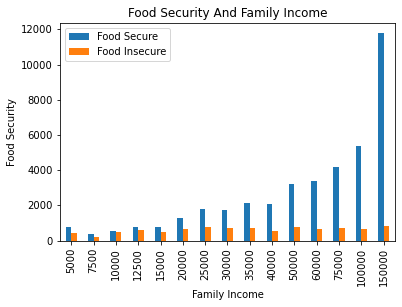

In [40]:
pd.crosstab(df.HEFAMINC,df.food_secure).plot(kind='bar')

plt.xlabel('Family Income')
plt.ylabel('Food Security')
plt.title('Food Security And Family Income')
plt.legend(('Food Secure', 'Food Insecure'));

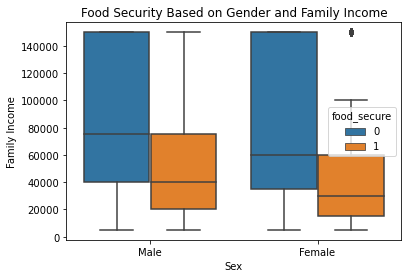

In [41]:
sns.boxplot(x=df['sex'], y=df['HEFAMINC'], hue=df['food_secure'])

plt.xlabel('Sex')
plt.ylabel('Family Income')
plt.title('Food Security Based on Gender and Family Income');

- To get rid of some of the outliers, I dropped the rows that had family income of over 150000 and experiencing food insecurity becasue that means that either some questions were answered wrong or got filled in wrong.

In [42]:
outliers = df.loc[(df['sex'] == 'Female') & (df['HEFAMINC'] == 150000) & (df['food_secure'] == 1)]

In [43]:
df.drop(outliers.index, inplace=True)

In [44]:
df.shape

(48870, 34)

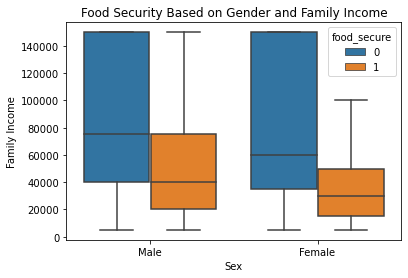

In [45]:
sns.boxplot(x=df['sex'], y=df['HEFAMINC'], hue=df['food_secure'])

plt.xlabel('Sex')
plt.ylabel('Family Income')
plt.title('Food Security Based on Gender and Family Income');

- I reran the box plot for food insecurity based on gander and family income after removing the outliers. There definitely seems to be a higher rate of experiencing food insecurity in males. This is an interesting find because there is almost an even split of males and females in the data set.

In [46]:
df['sex'].value_counts(normalize=True).mul(100).round(2)

Male      50.1
Female    49.9
Name: sex, dtype: float64

## Extra Analysis

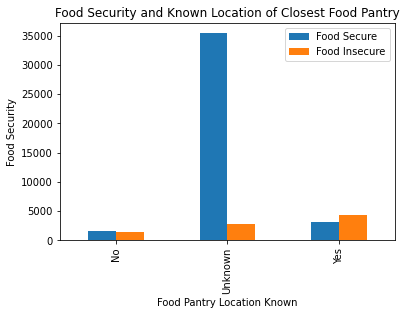

In [47]:
pd.crosstab(df.food_pantry,df.food_secure).plot(kind='bar')

plt.xlabel('Food Pantry Location Known')
plt.ylabel('Food Security')
plt.title('Food Security and Known Location of Closest Food Pantry')
plt.legend(('Food Secure', 'Food Insecure'));

- Luckily, most of the people who are food insecure, know where the closest food pantry is.

- I want to change the 'HETSP3O' column which is the question asking how much each household recieves in food stamps/assistance to a column that indicates if someone recieves any at all.

In [48]:
df['HETSP3O'].replace([20,190,200,300,100,648,70,150,180,50,500,80,130,30,90,120,350,400,160,
             170,140,60,110,40,360,600,230,250,510,240,330,320,10,220,210,280,550,
             270,380,640,260,420,450,430,290,540,340,620,460,440,310,370,4,520,560,590,
             390,480], ['yes', 'yes', 'yes', 'yes', 'yes','yes', 'yes', 
             'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes','yes', 'yes', 'yes',
             'yes', 'yes','yes', 'yes', 'yes', 'yes', 'yes','yes', 'yes', 'yes', 'yes', 
             'yes','yes', 'yes', 'yes', 'yes', 'yes','yes', 'yes', 'yes', 'yes', 'yes',
             'yes', 'yes', 'yes', 'yes', 'yes','yes', 'yes', 'yes', 'yes', 'yes','yes', 
             'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], inplace=True)

In [49]:
df['HETSP3O'] = df['HETSP3O'].map({0:'no', 'yes':'yes'})

In [50]:
df['HETSP3O'].value_counts()

no     46524
yes     2346
Name: HETSP3O, dtype: int64

In [51]:
df['has_stamps'] = df['HETSP3O']

In [52]:
df.drop('HETSP3O', axis=1, inplace=True)

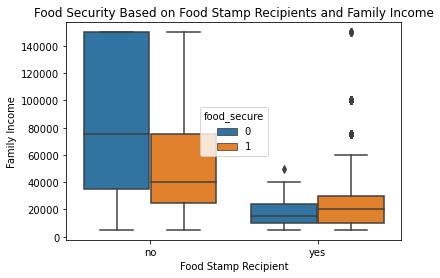

In [53]:
sns.boxplot(x=df['has_stamps'], y=df['HEFAMINC'], hue=df['food_secure']);

plt.xlabel('Food Stamp Recipient')
plt.ylabel('Family Income')
plt.title('Food Security Based on Food Stamp Recipients and Family Income');

In [54]:
df.loc[(df['HEFAMINC'] > 75000) & (df['has_stamps'] == 'yes')]

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HESP6,HESP7,HESP7A,...,marital_status,food_pantry,has_dis,mul_jobs,service_status,job_loss,type_job,in_union,in_school,has_stamps
4218,100000,6,30,0,0,4,1896,1,1,2,...,Yes,Unknown,No,NaN,Yes,Lost,ForProf,No,No,yes
5274,100000,6,50,0,42,0,2427,0,0,2,...,Yes,Yes,No,No,Yes,No,Gov,No,No,yes
7664,150000,6,30,0,48,3,3710,2,0,2,...,Yes,Unknown,No,Yes,No,No,ForProf,No,College,yes
12783,150000,1,20,0,70,0,6405,0,0,0,...,No,Unknown,No,No,No,No,ForProf,No,No,yes
16336,100000,6,40,0,40,1,8184,2,0,2,...,No,Yes,No,No,No,No,NonProf,No,No,yes
21512,100000,2,40,0,50,0,10914,0,0,0,...,Yes,Yes,No,No,Yes,No,ForProf,No,No,yes
26242,100000,6,40,0,0,1,13380,1,1,2,...,Yes,No,No,NaN,No,No,0,No,No,yes
27308,100000,1,50,0,0,0,13979,0,0,0,...,Divorced,Yes,No,NaN,No,No,0,No,No,yes
30815,150000,3,50,0,49,0,15736,0,0,0,...,Yes,Yes,No,No,No,No,Gov,No,No,yes
31029,100000,2,20,0,40,0,15833,0,0,0,...,No,Yes,No,No,No,No,ForProf,No,No,yes


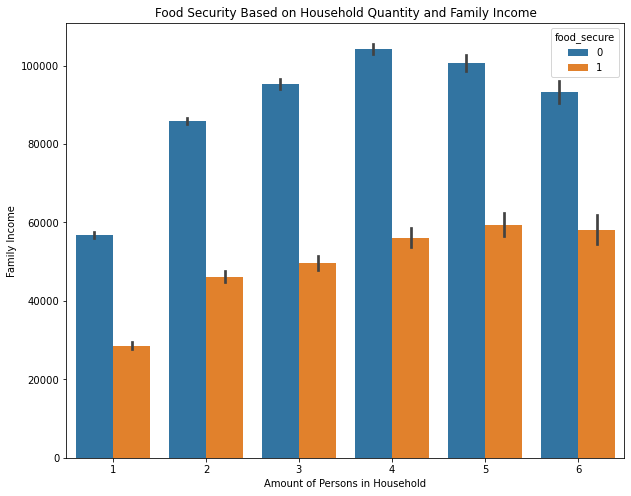

In [55]:
plt.figure(figsize=(10,8))

sns.barplot(x=df['HRNUMHOU'], y=df['HEFAMINC'], hue=df['food_secure']);

plt.xlabel('Amount of Persons in Household')
plt.ylabel('Family Income')
plt.title('Food Security Based on Household Quantity and Family Income');

- This graph is another way of showing food insecurity is seen based on the amount of individuals in a household along with the average family income.

- I want to change the marital status column to just show if someone is married or not rather than each reason why someone is not married.

In [56]:
df['marital_status'] = df['marital_status'].map({'Yes': 'yes', 'No': 'no', 
                        'Widow': 'no', 'Separate': 'no', 'Divorced': 'no'})

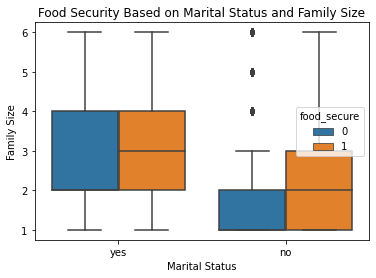

In [57]:
sns.boxplot(x=df['marital_status'], y=df['HRNUMHOU'], hue=df['food_secure']);

plt.xlabel('Marital Status')
plt.ylabel('Family Size')
plt.title('Food Security Based on Marital Status and Family Size');

- For those who are still married, there is no difference in food security/insecurity based on family size but those who were either divorced, separated, widowed, or never married experienced more food insecuirty with larger sized families.

- This next step I wanted to see if there were any mismatched values for the multiple jobs column indicating someone had no job but they had specified what type of job they do have in the job type column. If there is a significant amount of this occuring, the multiple jobs column will be dropped.

In [58]:
df['type_job'].value_counts(normalize=True).mul(100).round(2)

ForProf     40.24
0           38.01
Gov          9.39
Self-emp     7.64
NonProf      4.69
w/o pay      0.03
Name: type_job, dtype: float64

In [59]:
df['mul_jobs'].value_counts(normalize=True).mul(100).round(2)

No     93.72
Yes     6.28
Name: mul_jobs, dtype: float64

- Some individuals who have a job had 0's in the column idnicated how many jobs they had. So above I found the percentage of individuals in the data set who have more than 1 job and since it is less than 4% I am going to just drop that column.

In [60]:
df.drop('mul_jobs', axis=1, inplace=True)

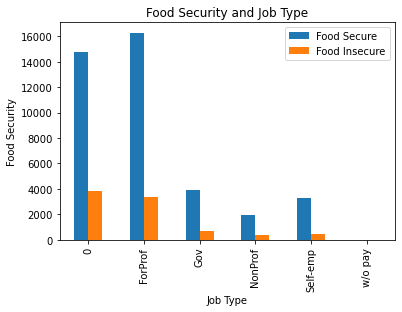

In [61]:
pd.crosstab(df.type_job,df.food_secure).plot(kind='bar')

plt.xlabel('Job Type')
plt.ylabel('Food Security')
plt.title('Food Security and Job Type')
plt.legend(('Food Secure', 'Food Insecure'));

- In the above graph we can see that most people in the data set either have a for profit job or no job indicated and those were the ones who experienced a higher percentage of food insecurity than someone who worked for the government, non-profit or unemployed. There are surprisningly a few people who have jobs without pay but it is so few people that it does not show up on the graph and will be changed to 0 for modeling purposes.

In [62]:
df['type_job'].replace(['w/o pay'], [0], inplace=True)

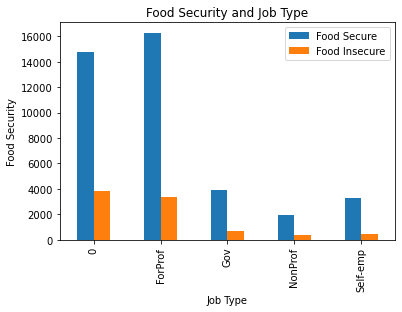

In [63]:
pd.crosstab(df.type_job,df.food_secure).plot(kind='bar')

plt.xlabel('Job Type')
plt.ylabel('Food Security')
plt.title('Food Security and Job Type')
plt.legend(('Food Secure', 'Food Insecure'));

- Here is the graph of job types after converting the w/o pay category to have values of 0's.

In [64]:
#saving cleaned data
df.to_csv('./data/cleaned_data.csv', index=False)